In [1]:
import probeinterface as pi
import numpy as np

import pickle
import matplotlib.pyplot as plt
import json
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import scipy.signal
import probeinterface as pi

import spikeinterface as si
#import spikeinterface.toolkit as st

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from spikeinterface import NumpySorting
from probeinterface import Probe, ProbeGroup

In [75]:
# Function to create a probe from electrode geometry
def to_probeinterface(electrodes_df):
    probe_df = electrodes_df.copy()
    probe_df.rename(
        columns={
            "electrode": "contact_ids",
            "shank": "shank_ids",
            "x_coord": "x",
            "y_coord": "y",
        },
        inplace=True,
    )
    return pi.Probe.from_dataframe(probe_df)

# Recording parameters
num_channels = 32
duration = 10.0  # seconds
sampling_frequency = 20000  # Hz

# Generate time vector
num_samples = int(duration * sampling_frequency)

# Define spike-wave parameters for realistic neuronal activity
spike_amplitude = 1000  # Amplitude of the spike (sharp component)
spike_duration = 0.002  # Duration of the spike (2 ms)
wave_amplitude = 300    # Amplitude of the slow wave (oscillatory component)
wave_duration = 0.05    # Duration of the wave (50 ms)
wave_frequency = 8      # Frequency of the slow wave (e.g., 8 Hz)

# Generate a single spike-wave complex
spike_samples = int(spike_duration * sampling_frequency)
wave_samples = int(wave_duration * sampling_frequency)

# Create the sharp spike (Gaussian-like shape)
spike_time = np.linspace(-1, 1, spike_samples)
sharp_spike = spike_amplitude * np.exp(-50 * spike_time**2)

# Create the slow wave (sinusoidal shape)
slow_wave_time = np.linspace(0, wave_duration, wave_samples)
slow_wave = wave_amplitude * np.sin(2 * np.pi * wave_frequency * slow_wave_time)

# Combine the sharp spike and slow wave into a single waveform
spike_wave_complex = np.concatenate((sharp_spike, slow_wave))

# Initialize recording array with zeros and insert spike-wave complex on one channel
recording = np.zeros((num_samples, num_channels))
spike_start_index = 5000  # Arbitrary start index for the spike-wave complex
spike_end_index = spike_start_index + len(spike_wave_complex)
recording[spike_start_index:spike_end_index, 0] = spike_wave_complex  # Insert on channel 0

# Create the electrode geometry DataFrame
electrode_geometry = pd.DataFrame({
    "electrode": np.arange(num_channels),
    "x_coord": np.zeros(num_channels),
    "y_coord": np.arange(0, num_channels * 100, 100),  # y-coordinates spaced by 100 µm
    "shank": np.zeros(num_channels),
    "channel_idx": np.arange(num_channels)
})

# Create the probe using the electrode geometry
probe = pi.Probe(ndim=2)  # Initialize a blank probe object with 2D geometry
probe.set_contacts(positions=electrode_geometry[["x_coord", "y_coord"]].values, shapes="circle", shape_params={"radius": 10})
probe.set_device_channel_indices(electrode_geometry["channel_idx"].values)

# Create the RecordingExtractor and attach the probe
recording_extractor = si.NumpyRecording([recording], sampling_frequency)
recording_extractor.set_probe(probe)

# Create spike_trains dictionary (single event for channel 0)
spike_trains = {0: np.array([spike_start_index])}

# Save the recording data, sampling frequency, spike trains, and probe information to a .pkl file
with open('synthetic_recording_with_spike_wave.pkl', 'wb') as f:
    pickle.dump({
        'recording_data': recording,
        'sampling_frequency': sampling_frequency,
        'spike_trains': spike_trains,
        'probe': probe.to_dict()  # Save the probe as a dictionary
    }, f)

print("Data has been saved to 'synthetic_recording_with_spike_wave.pkl'")

Data has been saved to 'synthetic_recording_with_spike_wave.pkl'


In [2]:

# Load the .pkl file
with open('synthetic_recording_with_spike_wave.pkl', 'rb') as f:
    data = pickle.load(f)

# Inspect keys and content
print("Keys in data:", data.keys())

recording = data['recording_data']
sampling_frequency = data['sampling_frequency']
spike_trains = data['spike_trains']

# Check recording shape and spike trains
print(f"Recording shape: {recording.shape}")
print(f"Sampling frequency: {sampling_frequency} Hz")
print(f"Spike trains: {spike_trains}")

# Verify if channel 0 contains the sine wave spike
print("Channel 0 data (around spike):")
spike_start_index = list(spike_trains.values())[0][0]
print(recording[spike_start_index-10:spike_start_index+50, 0])


Keys in data: dict_keys(['recording_data', 'sampling_frequency', 'spike_trains', 'probe'])
Recording shape: (200000, 32)
Sampling frequency: 20000 Hz
Spike trains: {0: array([5000])}
Channel 0 data (around spike):
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.92874985e-19 2.85312404e-17
 3.24453543e-15 2.83642631e-13 1.90624014e-11 9.84851685e-10
 3.91157060e-08 1.19431430e-06 2.80332346e-05 5.05842025e-04
 7.01687471e-03 7.48272278e-02 6.13426746e-01 3.86592014e+00
 1.87296718e+01 6.97580890e+01 1.99731287e+02 4.39627393e+02
 7.43893062e+02 9.67661339e+02 9.67661339e+02 7.43893062e+02
 4.39627393e+02 1.99731287e+02 6.97580890e+01 1.87296718e+01
 3.86592014e+00 6.13426746e-01 7.48272278e-02 7.01687471e-03
 5.05842025e-04 2.80332346e-05 1.19431430e-06 3.91157060e-08
 9.84851685e-10 1.90624014e-11 2.83642631e-13 3.24453543e-15
 2.85312404e-17 1.92874985e-19 0.00000000e+00 7.547361

Keys in data: dict_keys(['recording_data', 'sampling_frequency', 'spike_trains', 'probe'])
Recording shape: (200000, 32)
Sampling frequency: 20000 Hz

Number of channels: 32
Sampling frequency: 20000.0 Hz
Duration: 10.0 seconds


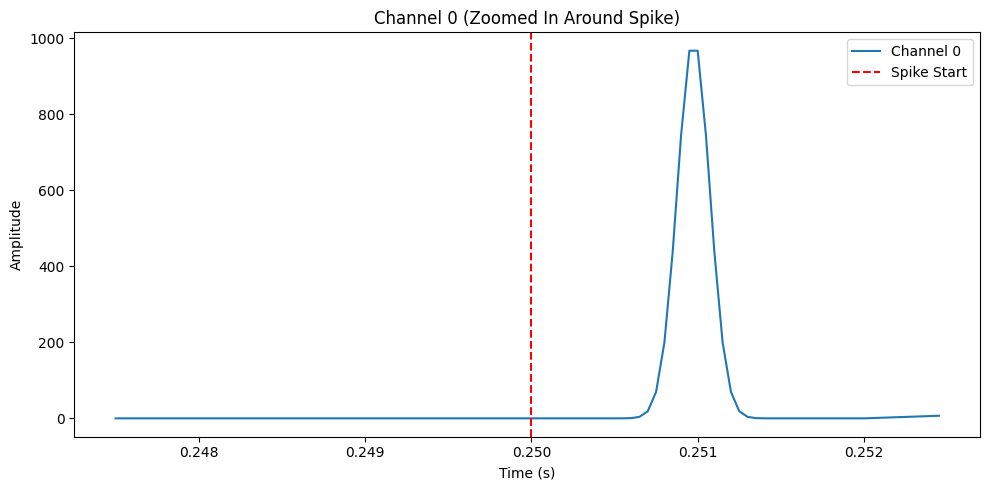

NameError: name 'dpi_value' is not defined

In [3]:

# Debugging Step: Load Data and Inspect Keys
try:
    with open('synthetic_recording_with_spike_wave.pkl', 'rb') as f:
        data = pickle.load(f)
    print("Keys in data:", data.keys())
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Extract Data
try:
    recording = data['recording_data']
    sampling_frequency = data['sampling_frequency']
    spike_trains = data['spike_trains']
    probe_dict = data['probe']
except KeyError as e:
    print(f"Missing key in data: {e}")
    exit()

# Debugging Step: Check Recording Shape and Sampling Frequency
print(f"Recording shape: {recording.shape}")
print(f"Sampling frequency: {sampling_frequency} Hz")

# Initialize RecordingExtractor
try:
    recording_extractor = si.NumpyRecording([recording], sampling_frequency=sampling_frequency)
except Exception as e:
    print(f"Error initializing NumpyRecording: {e}")
    exit()

# Attach the probe to the RecordingExtractor
try:
    from probeinterface import Probe
    probe = Probe.from_dict(probe_dict)
    recording_extractor.set_probe(probe)
except Exception as e:
    print(f"Error setting probe: {e}")
    exit()

# Basic Info About the Data
try:
    print(f"\nNumber of channels: {recording_extractor.get_num_channels()}")
    print(f"Sampling frequency: {recording_extractor.get_sampling_frequency()} Hz")
    print(f"Duration: {recording_extractor.get_total_duration()} seconds")
except Exception as e:
    print(f"Error accessing recording info: {e}")
    exit()

# Configuration for Plotting
start_time = (5000 - 50) / sampling_frequency  # Start slightly before the spike
end_time = (5000 + 50) / sampling_frequency    # End slightly after the spike
start_sample = int(start_time * sampling_frequency)
end_sample = int(end_time * sampling_frequency)

times = np.arange(recording.shape[0]) / sampling_frequency

# Plot Channel 0 (zoomed in around spike)
plt.figure(figsize=(10, 5))
plt.plot(times[start_sample:end_sample], recording[start_sample:end_sample, 0], label="Channel 0")
plt.axvline(x=5000 / sampling_frequency, color='red', linestyle='--', label="Spike Start")
plt.title("Channel 0 (Zoomed In Around Spike)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

# Function to Plot a Subset of Channels
def plot_channel_subset(channels, fig_title):
    plt.figure(figsize=(15, 8), dpi=dpi_value)
    plt.title(fig_title)
    
    for ch in channels:
        channel_data = recording[start_sample:end_sample, ch]
        plt.plot(
            times[start_sample:end_sample],
            channel_data,
            label=f'Channel {ch}'
        )
    
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot Channel 0 (since the sine wave spike is on channel 0)
plot_channel_subset([0], "Channel 0 (Single Sine Wave Spike)")

# Display Spike Trains Information
print("\nSpike Trains:")
for unit, spikes in spike_trains.items():
    print(f"Unit {unit}: Spike times (samples) -> {spikes}")


In [4]:

# Parameters to modify
num_spikes = 12  # Number of spike-wave complexes to generate
recording_duration = 10.0  # seconds
sampling_frequency = 20000  # Hz
placement_window = 0.50  # seconds (spikes will be placed within this time window)

# Spike-wave complex shapes
def generate_sharp_spike(amplitude, duration, sampling_frequency):
    """Generate a sharp spike resembling neuronal activity."""
    samples = int(duration * sampling_frequency)
    time = np.linspace(-1, 1, samples)
    return amplitude * np.exp(-50 * time**2)

def generate_slow_wave(amplitude, duration, frequency, sampling_frequency):
    """Generate a slow wave resembling neuronal oscillations."""
    samples = int(duration * sampling_frequency)
    time = np.linspace(0, duration, samples)
    return amplitude * np.sin(2 * np.pi * frequency * time)

def generate_spike_wave_complex(shape_type, sampling_frequency):
    """Generate different types of spike-wave complexes."""
    if shape_type == "sharp_spike_slow_wave":
        # Sharp spike followed by slow wave
        sharp_spike = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        slow_wave = generate_slow_wave(amplitude=300, duration=0.05, frequency=8, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike, slow_wave))
    
    elif shape_type == "double_spike":
        # Double sharp spikes with a gap
        sharp_spike1 = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        gap = np.zeros(int(0.01 * sampling_frequency))  # Gap of 10 ms
        sharp_spike2 = generate_sharp_spike(amplitude=800, duration=0.002, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike1, gap, sharp_spike2))
    
    elif shape_type == "oscillatory_burst":
        # Oscillatory burst resembling high-frequency activity
        burst_duration = 0.05  # 50 ms burst
        burst_frequency = 100  # High-frequency oscillation (100 Hz)
        return generate_slow_wave(amplitude=500, duration=burst_duration, frequency=burst_frequency, sampling_frequency=sampling_frequency)

# Initialize the recording array
num_samples = int(recording_duration * sampling_frequency)
num_channels = 32
recording = np.zeros((num_samples, num_channels))

# Randomly place spikes in the recording on channel 0 within a smaller window
np.random.seed(42)  # For reproducibility
spike_trains = {0: []}  # Spike trains dictionary for channel 0

placement_start_index = int((recording_duration / 2 - placement_window / 2) * sampling_frequency)
placement_end_index = int((recording_duration / 2 + placement_window / 2) * sampling_frequency)

current_position = placement_start_index

for _ in range(num_spikes):
    shape_type = np.random.choice(["sharp_spike_slow_wave", "double_spike", "oscillatory_burst"])
    spike_wave_complex = generate_spike_wave_complex(shape_type, sampling_frequency)
    
    # Ensure there is enough space between spikes by advancing the current position
    if current_position + len(spike_wave_complex) >= placement_end_index:
        break
    
    recording[current_position:current_position + len(spike_wave_complex), 0] += spike_wave_complex
    spike_trains[0].append(current_position)
    
    # Move position forward by the length of the current spike-wave complex plus a small gap (to ensure no overlap)
    current_position += len(spike_wave_complex) + int(0.01 * sampling_frequency)  # Add a gap of at least 10 ms

# Create the electrode geometry DataFrame
electrode_geometry = pd.DataFrame({
    "electrode": np.arange(num_channels),
    "x_coord": np.zeros(num_channels),
    "y_coord": np.arange(0, num_channels * 100, 100),  # y-coordinates spaced by 100 µm
    "shank": np.zeros(num_channels),
    "channel_idx": np.arange(num_channels)
})

# Create the probe using the electrode geometry
probe = pi.Probe(ndim=2)  # Initialize a blank probe object with 2D geometry
probe.set_contacts(positions=electrode_geometry[["x_coord", "y_coord"]].values, shapes="circle", shape_params={"radius": 10})
probe.set_device_channel_indices(electrode_geometry["channel_idx"].values)

# Create the RecordingExtractor and attach the probe
recording_extractor = si.NumpyRecording([recording], sampling_frequency)
recording_extractor.set_probe(probe)

# Save the recording data and metadata to a .pkl file
with open('synthetic_recording_with_continuous_graph.pkl', 'wb') as f:
    pickle.dump({
        'recording_data': recording,
        'sampling_frequency': sampling_frequency,
        'spike_trains': spike_trains,
        'probe': probe.to_dict()  # Save the probe as a dictionary
    }, f)

print("Data has been saved to 'synthetic_recording_with_continuous_graph.pkl'")


Data has been saved to 'synthetic_recording_with_continuous_graph.pkl'


In [5]:

# Load the .pkl file
with open('synthetic_recording_with_continuous_graph.pkl', 'rb') as f:
    data = pickle.load(f)

# Inspect keys and content
print("Keys in data:", data.keys())

recording = data['recording_data']
sampling_frequency = data['sampling_frequency']
spike_trains = data['spike_trains']

# Check recording shape and spike trains
print(f"Recording shape: {recording.shape}")
print(f"Sampling frequency: {sampling_frequency} Hz")
print(f"Spike trains: {spike_trains}")

# Verify if channel 0 contains the sine wave spike
print("Channel 0 data (around spike):")
spike_start_index = list(spike_trains.values())[0][0]
print(recording[spike_start_index-10:spike_start_index+50, 0])

Keys in data: dict_keys(['recording_data', 'sampling_frequency', 'spike_trains', 'probe'])
Recording shape: (200000, 32)
Sampling frequency: 20000 Hz
Spike trains: {0: [95000, 96200, 97440, 98640, 99840, 101080, 102320, 103520]}
Channel 0 data (around spike):
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          15.72109546  31.42664502  47.10111816  62.72901509
  78.29488206  93.78332669 109.17903312 124.46677723 139.63144165
 154.65803069 169.53168525 184.23769741 198.76152504 213.08880619
 227.20537322 241.0972669  254.75075014 268.15232162 281.28872911
 294.1469826  306.71436713 318.97845538 330.92711991 342.54854524
 353.83123944 364.76404556 375.33615263 385.53710635 395.35681946
 404.78558167 413.8140693  422.43335448 430.63491397 438.41063762
 445.75283635 452.65424979 459.10805344 465.10786541 470.64775276
 475.72223734 480.32630121 484.45539162 488.10542549 491.27279346
 493.95436347 496.14748383 497

Keys in data: dict_keys(['recording_data', 'sampling_frequency', 'spike_trains', 'probe'])
Recording shape: (200000, 32)
Sampling frequency: 20000 Hz
Spike Trains:
Unit 0: Spike times (samples) -> [95000, 96200, 97440, 98640, 99840, 101080, 102320, 103520]


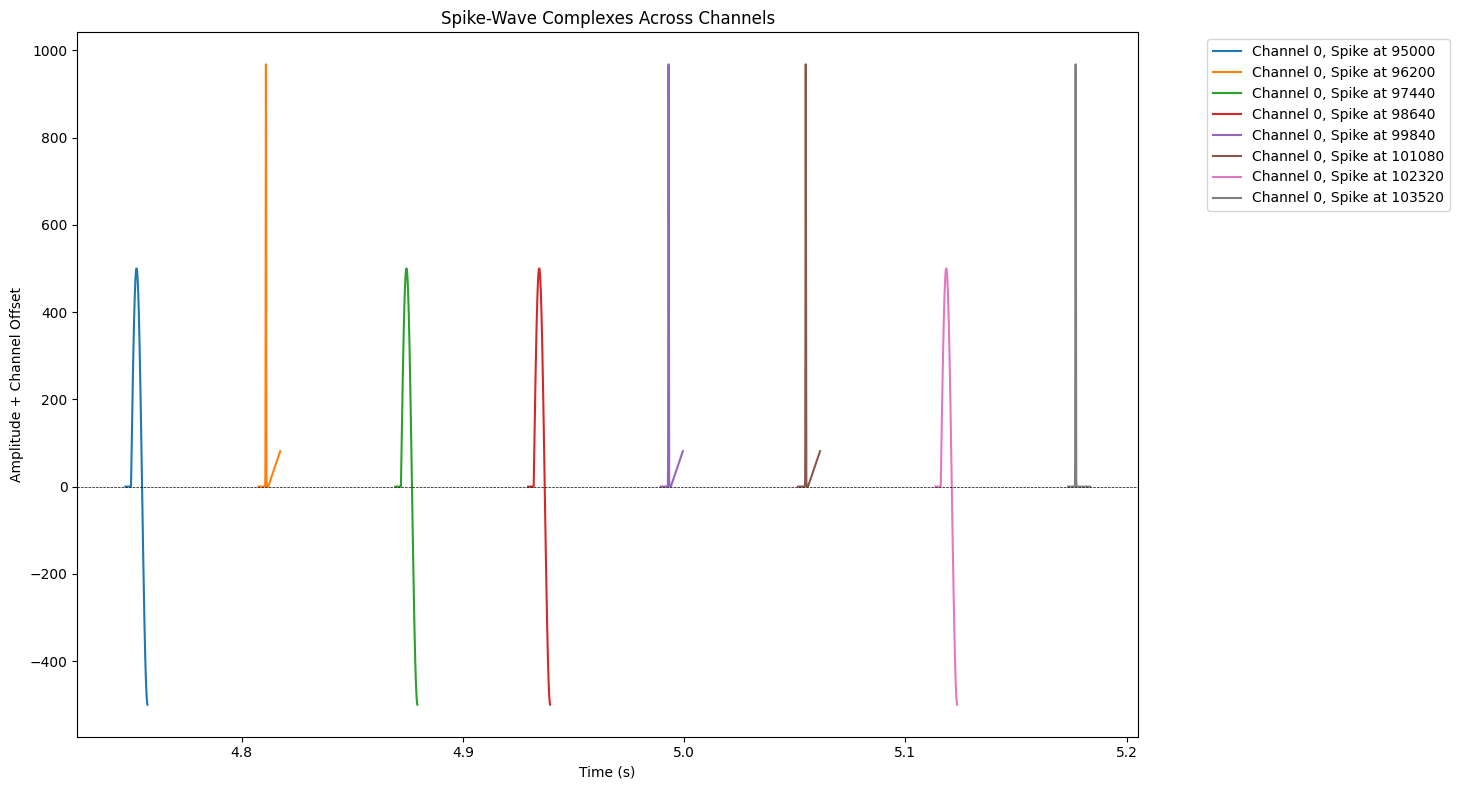

In [51]:
# Load the .pkl file
try:
    with open('synthetic_recording_with_continuous_graph.pkl', 'rb') as f:
        data = pickle.load(f)
    print("Keys in data:", data.keys())
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Extract Data
try:
    recording = data['recording_data']
    sampling_frequency = data['sampling_frequency']
    spike_trains = data['spike_trains']
except KeyError as e:
    print(f"Missing key in data: {e}")
    exit()

# Debugging Step: Check Recording Shape and Spike Trains
print(f"Recording shape: {recording.shape}")
print(f"Sampling frequency: {sampling_frequency} Hz")
print("Spike Trains:")
for unit, spikes in spike_trains.items():
    print(f"Unit {unit}: Spike times (samples) -> {spikes}")

# Plot spikes for all channels
plt.figure(figsize=(15, 8))
offset_increment = 1000  # Offset between channels for visualization
channel_offset = 0

for channel, spikes in spike_trains.items():
    # Plot all spikes for this channel
    for spike_time in spikes:
        # Define a time window around the spike
        start_time = (spike_time - 50) / sampling_frequency  # Start slightly before the spike
        end_time = (spike_time + 150) / sampling_frequency   # End slightly after the spike
        start_sample = int(start_time * sampling_frequency)
        end_sample = int(end_time * sampling_frequency)

        # Add the spike to the plot with an offset for the channel
        plt.plot(
            np.arange(start_sample, end_sample) / sampling_frequency,
            recording[start_sample:end_sample, channel] + channel_offset,
            label=f"Channel {channel}, Spike at {spike_time}"
        )
    
    # Add an offset for the next channel
    channel_offset += offset_increment

# Add labels and legend
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.title("Spike-Wave Complexes Across Channels")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude + Channel Offset")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1)
plt.tight_layout()
plt.show()

In [29]:

# Parameters to modify
num_spikes = 10         # Number of spike-wave complexes to generate
recording_duration = 5.0 # seconds
sampling_frequency = 20000 # Hz
placement_window = 1.0    # seconds (spikes will be placed within this time window)

# Spike-wave complex shapes
def generate_sharp_spike(amplitude, duration, sampling_frequency):
    """Generate a sharp spike resembling neuronal activity."""
    samples = int(duration * sampling_frequency)
    time = np.linspace(-1, 1, samples)
    return amplitude * np.exp(-50 * time**2)

def generate_slow_wave(amplitude, duration, frequency, sampling_frequency):
    """Generate a slow wave resembling neuronal oscillations."""
    samples = int(duration * sampling_frequency)
    time = np.linspace(0, duration, samples)
    return amplitude * np.sin(2 * np.pi * frequency * time)

def generate_spike_wave_complex(shape_type, sampling_frequency):
    """Generate different types of spike-wave complexes."""
    if shape_type == "sharp_spike_slow_wave":
        # Sharp spike followed by slow wave
        sharp_spike = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        slow_wave = generate_slow_wave(amplitude=300, duration=0.05, frequency=8, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike, slow_wave))
    
    elif shape_type == "double_spike":
        # Double sharp spikes with a gap
        sharp_spike1 = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        gap = np.zeros(int(0.01 * sampling_frequency))  # Gap of 10 ms
        sharp_spike2 = generate_sharp_spike(amplitude=800, duration=0.002, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike1, gap, sharp_spike2))
    
    elif shape_type == "oscillatory_burst":
        # Oscillatory burst resembling high-frequency activity
        burst_duration = 0.05  # 50 ms burst
        burst_frequency = 100  # High-frequency oscillation (100 Hz)
        return generate_slow_wave(amplitude=500, duration=burst_duration, frequency=burst_frequency, sampling_frequency=sampling_frequency)

# Initialize the recording array with random noise (baseline)
num_samples = int(recording_duration * sampling_frequency)
num_channels = 32
recording = np.random.normal(0, 50, (num_samples, num_channels))  # Gaussian noise with mean 0, std 50

# Randomly place spikes in the recording on channel 0 within a smaller window
np.random.seed(42)  # For reproducibility
spike_trains = {0: []}  # Spike trains dictionary for channel 0

placement_start_index = int((recording_duration / 2 - placement_window / 2) * sampling_frequency)
placement_end_index = int((recording_duration / 2 + placement_window / 2) * sampling_frequency)

current_position = placement_start_index

for _ in range(num_spikes):
    shape_type = np.random.choice(["sharp_spike_slow_wave", "double_spike", "oscillatory_burst"])
    spike_wave_complex = generate_spike_wave_complex(shape_type, sampling_frequency)
    
    # Ensure there is enough space between spikes by advancing the current position
    if current_position + len(spike_wave_complex) >= placement_end_index:
        break
    
    recording[current_position:current_position + len(spike_wave_complex), 0] += spike_wave_complex
    spike_trains[0].append(current_position)
    
    # Move position forward by the length of the current spike-wave complex plus a small gap (to ensure no overlap)
    current_position += len(spike_wave_complex) + int(0.01 * sampling_frequency)  # Gap of at least 10 ms

# Create the electrode geometry DataFrame
electrode_geometry = pd.DataFrame({
    "electrode": np.arange(num_channels),
    "x_coord": np.zeros(num_channels),
    "y_coord": np.arange(0, num_channels * 100, 100),  # y-coordinates spaced by 100 µm
    "shank": np.zeros(num_channels),
    "channel_idx": np.arange(num_channels)
})

# Create the probe using the electrode geometry
probe = pi.Probe(ndim=2)  # Initialize a blank probe object with 2D geometry
probe.set_contacts(positions=electrode_geometry[["x_coord", "y_coord"]].values, shapes="circle", shape_params={"radius": 10})
probe.set_device_channel_indices(electrode_geometry["channel_idx"].values)

# Create the RecordingExtractor and attach the probe
recording_extractor = si.NumpyRecording([recording], sampling_frequency)
recording_extractor.set_probe(probe)

# Save the recording data and metadata to a .pkl file
with open('synthetic_recording_with_random_noise.pkl', 'wb') as f:
    pickle.dump({
        'recording_data': recording,
        'sampling_frequency': sampling_frequency,
        'spike_trains': spike_trains,
        'probe': probe.to_dict()  # Save the probe as a dictionary
    }, f)

print("Data has been saved to 'synthetic_recording_with_random_noise.pkl'")


Data has been saved to 'synthetic_recording_with_random_noise.pkl'


In [30]:
# Load the .pkl file
with open('synthetic_recording_with_random_noise.pkl', 'rb') as f:
    data = pickle.load(f)

# Inspect keys and content
print("Keys in data:", data.keys())

recording = data['recording_data']
sampling_frequency = data['sampling_frequency']
spike_trains = data['spike_trains']

# Check recording shape and spike trains
print(f"Recording shape: {recording.shape}")
print(f"Sampling frequency: {sampling_frequency} Hz")
print(f"Spike trains: {spike_trains}")

# Verify if channel 0 contains the sine wave spike
print("Channel 0 data (around spike):")
spike_start_index = list(spike_trains.values())[0][0]
print(recording[spike_start_index-10:spike_start_index+50, 0])

Keys in data: dict_keys(['recording_data', 'sampling_frequency', 'spike_trains', 'probe'])
Recording shape: (100000, 32)
Sampling frequency: 20000 Hz
Spike trains: {0: [40000, 41200, 42440, 43640, 44840, 46080, 47320, 48520, 49000, 50200]}
Channel 0 data (around spike):
[ 42.37862753 -29.39148268  74.74163152 -15.39953766  15.02128095
 -50.36002989  46.54516445 -32.4019348    2.25530462 -43.08033266
  34.74711876  34.31797996  53.1360768   65.23626602  64.7117897
  69.52970343 144.17023066 168.16605354 168.90309278 217.71330349
 174.34596326 179.96310357 255.06010694 137.696446   304.01571663
 184.93301783 264.47583118 168.00659433 282.02354582 337.0859331
 389.48172077 269.7141544  316.50453736 265.71572474 379.01111475
 349.31774688 355.66892542 306.93086839 450.55410216 430.14891477
 404.64874513 471.41883968 428.46991947 363.96339133 342.03639499
 497.8699547  506.53911396 444.3634994  427.06713525 369.45780153
 513.46749694 447.18351424 516.48575893 525.1983463  533.42134525
 545.

Keys in data: dict_keys(['recording_data', 'sampling_frequency', 'spike_trains', 'probe'])
Recording shape: (100000, 32)
Sampling frequency: 20000 Hz
Spike Trains:
Unit 0: Spike times (samples) -> [48860]
Unit 1: Spike times (samples) -> [49130]
Unit 2: Spike times (samples) -> [51092]
Unit 3: Spike times (samples) -> [50169]
Unit 4: Spike times (samples) -> [49238]
Unit 5: Spike times (samples) -> [49482]
Unit 6: Spike times (samples) -> [51444]
Unit 7: Spike times (samples) -> [50919]
Unit 8: Spike times (samples) -> [48130]
Unit 9: Spike times (samples) -> [51380]
Unit 10: Spike times (samples) -> [50391]
Unit 11: Spike times (samples) -> [51485]
Unit 12: Spike times (samples) -> [50433]
Unit 13: Spike times (samples) -> [48955]
Unit 14: Spike times (samples) -> [49184]
Unit 15: Spike times (samples) -> [51385]
Unit 16: Spike times (samples) -> [50300]
Unit 17: Spike times (samples) -> [50904]
Unit 18: Spike times (samples) -> [48474]
Unit 19: Spike times (samples) -> [50558]
Unit 2

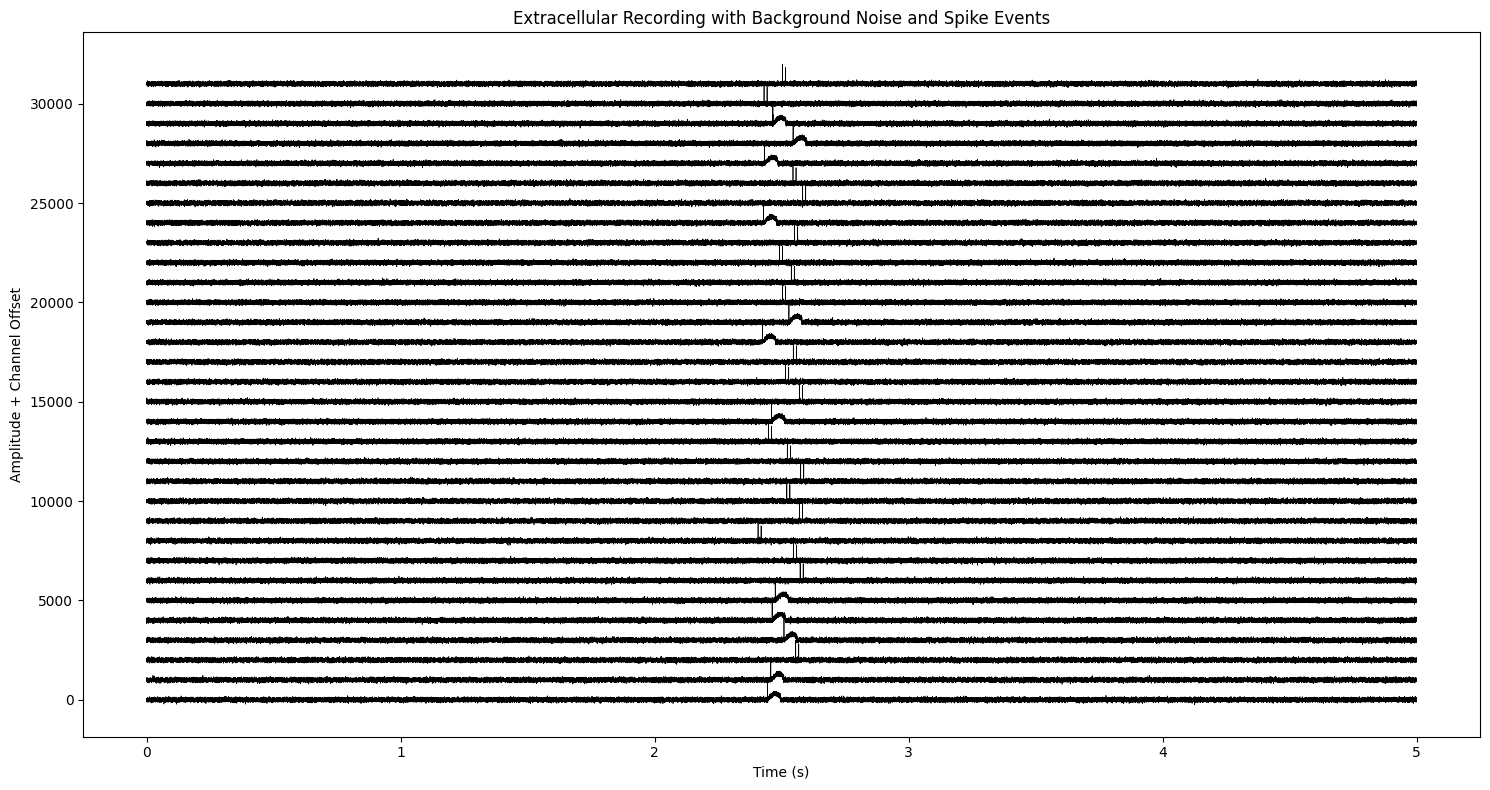

In [57]:

# Load the .pkl file
try:
    with open('synthetic_recording_with_random_noise.pkl', 'rb') as f:
        data = pickle.load(f)
    print("Keys in data:", data.keys())
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Extract Data
try:
    recording = data['recording_data']
    sampling_frequency = data['sampling_frequency']
    spike_trains = data['spike_trains']
except KeyError as e:
    print(f"Missing key in data: {e}")
    exit()

# Debugging: Check recording shape and spike trains
print(f"Recording shape: {recording.shape}")
print(f"Sampling frequency: {sampling_frequency} Hz")
print("Spike Trains:")
for unit, spikes in spike_trains.items():
    print(f"Unit {unit}: Spike times (samples) -> {spikes}")

# Create time vector for the full recording duration
num_samples = recording.shape[0]
time_vec = np.arange(num_samples) / sampling_frequency

# Plot the entire recording for all channels with offsets.
# The offset visually separates each channel's trace.
plt.figure(figsize=(15, 8))
offset_increment = 1000  # adjust as needed for clarity
for ch in range(recording.shape[1]):
    offset = ch * offset_increment
    plt.plot(time_vec, recording[:, ch] + offset, color='black', lw=0.5)

# If there are spike times for channel 0, mark them in the plot.
# Here we add vertical dashed red lines at the spike events.
#if 0 in spike_trains:
 #   for spike in spike_trains[0]:
  #      spike_time = spike / sampling_frequency
    #    plt.axvline(spike_time, color='red', linestyle='--', lw=1)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude + Channel Offset")
plt.title("Extracellular Recording with Background Noise and Spike Events")
plt.tight_layout()
plt.show()


In [44]:

# Parameters to modify
num_spikes = 1         # Number of spike-wave complexes to generate per channel
recording_duration = 1.0 # seconds
sampling_frequency = 20000 # Hz
placement_window = 0.90    # seconds (spikes will be placed within this time window)

# Spike-wave complex shapes
def generate_sharp_spike(amplitude, duration, sampling_frequency):
    """Generate a sharp spike resembling neuronal activity."""
    samples = int(duration * sampling_frequency)
    time = np.linspace(-1, 1, samples)
    return amplitude * np.exp(-50 * time**2)


def generate_spike_wave_complex(shape_type, sampling_frequency):
    """Generate different types of spike-wave complexes."""
    if shape_type == "sharp_spike_slow_wave":
        # Sharp spike followed by slow wave
        sharp_spike = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        slow_wave = generate_slow_wave(amplitude=300, duration=0.05, frequency=8, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike, slow_wave))
    
    elif shape_type == "double_spike":
        # Double sharp spikes with a gap
        sharp_spike1 = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        gap = np.zeros(int(0.01 * sampling_frequency))  # Gap of 10 ms
        sharp_spike2 = generate_sharp_spike(amplitude=800, duration=0.002, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike1, gap, sharp_spike2))
    
    elif shape_type == "oscillatory_burst":
        # Oscillatory burst resembling high-frequency activity
        burst_duration = 0.05  # 50 ms burst
        burst_frequency = 100  # High-frequency oscillation (100 Hz)
        return generate_slow_wave(amplitude=500, duration=burst_duration, frequency=burst_frequency, sampling_frequency=sampling_frequency)

# Initialize the recording array with random noise (baseline)
num_samples = int(recording_duration * sampling_frequency)
num_channels = 32
recording = np.random.normal(0, 50, (num_samples, num_channels))  # Gaussian noise with mean 0, std 50

# Randomly place spikes on all channels within a specified time window
np.random.seed(42)  # For reproducibility
spike_trains = {}  # Dictionary to hold spike times for each channel

placement_start_index = int((recording_duration / 2 - placement_window / 2) * sampling_frequency)
placement_end_index = int((recording_duration / 2 + placement_window / 2) * sampling_frequency)

# Loop over each channel to generate spike-wave complexes independently
for channel in range(num_channels):
    spike_trains[channel] = []
    current_position = placement_start_index
    for _ in range(num_spikes):
        shape_type = np.random.choice(["sharp_spike_slow_wave", "double_spike"])
        spike_wave_complex = generate_spike_wave_complex(shape_type, sampling_frequency)
        
        # Ensure there is enough space between spikes by advancing the current position
        if current_position + len(spike_wave_complex) >= placement_end_index:
            break
        
        recording[current_position:current_position + len(spike_wave_complex), channel] += spike_wave_complex
        spike_trains[channel].append(current_position)
        
        # Move position forward by the length of the current spike-wave complex plus a gap (at least 10 ms)
        current_position += len(spike_wave_complex) + int(0.01 * sampling_frequency)

# Create the electrode geometry DataFrame
electrode_geometry = pd.DataFrame({
    "electrode": np.arange(num_channels),
    "x_coord": np.zeros(num_channels),
    "y_coord": np.arange(0, num_channels * 100, 100),  # y-coordinates spaced by 100 µm
    "shank": np.zeros(num_channels),
    "channel_idx": np.arange(num_channels)
})

# Create the probe using the electrode geometry
probe = pi.Probe(ndim=2)  # Initialize a blank probe object with 2D geometry
probe.set_contacts(positions=electrode_geometry[["x_coord", "y_coord"]].values, shapes="circle", shape_params={"radius": 10})
probe.set_device_channel_indices(electrode_geometry["channel_idx"].values)

# Create the RecordingExtractor and attach the probe
recording_extractor = si.NumpyRecording([recording], sampling_frequency)
recording_extractor.set_probe(probe)

# Save the recording data and metadata to a .pkl file
with open('synthetic_recording_with_random_noise.pkl', 'wb') as f:
    pickle.dump({
        'recording_data': recording,
        'sampling_frequency': sampling_frequency,
        'spike_trains': spike_trains,
        'probe': probe.to_dict()  # Save the probe as a dictionary
    }, f)

print("Data has been saved to 'synthetic_recording_with_random_noise.pkl'")


Data has been saved to 'synthetic_recording_with_random_noise.pkl'


In [56]:

# Parameters to modify
num_spikes = 1         # Number of spike-wave complexes to generate per channel
recording_duration = 5.0 # seconds
sampling_frequency = 20000 # Hz
placement_window = 0.20    # seconds (spikes will be placed within this time window)

# Spike-wave complex shapes
def generate_sharp_spike(amplitude, duration, sampling_frequency):
    """Generate a sharp spike resembling neuronal activity."""
    samples = int(duration * sampling_frequency)
    time = np.linspace(-1, 1, samples)
    return amplitude * np.exp(-50 * time**2)

def generate_slow_wave(amplitude, duration, frequency, sampling_frequency):
    """Generate a slow wave resembling neuronal oscillations."""
    samples = int(duration * sampling_frequency)
    time = np.linspace(0, duration, samples)
    return amplitude * np.sin(2 * np.pi * frequency * time)

def generate_spike_wave_complex(shape_type, sampling_frequency):
    """Generate different types of spike-wave complexes."""
    if shape_type == "sharp_spike_slow_wave":
        # Sharp spike followed by slow wave
        sharp_spike = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        slow_wave = generate_slow_wave(amplitude=300, duration=0.05, frequency=8, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike, slow_wave))
    
    elif shape_type == "double_spike":
        # Double sharp spikes with a gap
        sharp_spike1 = generate_sharp_spike(amplitude=1000, duration=0.002, sampling_frequency=sampling_frequency)
        gap = np.zeros(int(0.01 * sampling_frequency))  # Gap of 10 ms
        sharp_spike2 = generate_sharp_spike(amplitude=800, duration=0.002, sampling_frequency=sampling_frequency)
        return np.concatenate((sharp_spike1, gap, sharp_spike2))
    
    elif shape_type == "oscillatory_burst":
        # Oscillatory burst resembling high-frequency activity
        burst_duration = 0.05  # 50 ms burst
        burst_frequency = 100  # High-frequency oscillation (100 Hz)
        return generate_slow_wave(amplitude=500, duration=burst_duration, frequency=burst_frequency, sampling_frequency=sampling_frequency)

# Initialize the recording array with random noise (baseline)
num_samples = int(recording_duration * sampling_frequency)
num_channels = 32
recording = np.random.normal(0, 50, (num_samples, num_channels))  # Gaussian noise with mean 0, std 50

# Define the placement window indices
placement_start_index = int((recording_duration / 2 - placement_window / 2) * sampling_frequency)
placement_end_index = int((recording_duration / 2 + placement_window / 2) * sampling_frequency)

# Randomly place spikes on all channels within the specified time window
np.random.seed(42)  # For reproducibility
spike_trains = {}  # Dictionary to hold spike start times for each channel

# For each channel, randomly choose candidate positions ensuring there is no overlap.
for channel in range(num_channels):
    spike_trains[channel] = []
    # We'll track the intervals as tuples: (start, end)
    intervals = []
    attempts = 0
    max_attempts = 1000  # prevent infinite loops if space is limited
    while len(spike_trains[channel]) < num_spikes and attempts < max_attempts:
        shape_type = np.random.choice(["sharp_spike_slow_wave", "double_spike"])
        spike_wave_complex = generate_spike_wave_complex(shape_type, sampling_frequency)
        spike_length = len(spike_wave_complex)
        # Randomly choose a candidate start index ensuring the spike fits within the window
        candidate = np.random.randint(placement_start_index, placement_end_index - spike_length)
        candidate_interval = (candidate, candidate + spike_length)
        
        # Check for overlap with already placed spikes
        overlap = False
        for (start, end) in intervals:
            if not (candidate_interval[1] <= start or candidate_interval[0] >= end):
                overlap = True
                break
        
        if overlap:
            attempts += 1
            continue
        
        # If no overlap found, place the spike-wave complex
        recording[candidate:candidate+spike_length, channel] += spike_wave_complex
        spike_trains[channel].append(candidate)
        intervals.append(candidate_interval)
        attempts += 1
        
# Create the electrode geometry DataFrame
electrode_geometry = pd.DataFrame({
    "electrode": np.arange(num_channels),
    "x_coord": np.zeros(num_channels),
    "y_coord": np.arange(0, num_channels * 100, 100),  # y-coordinates spaced by 100 µm
    "shank": np.zeros(num_channels),
    "channel_idx": np.arange(num_channels)
})

# Create the probe using the electrode geometry
probe = pi.Probe(ndim=2)  # Initialize a blank probe object with 2D geometry
probe.set_contacts(positions=electrode_geometry[["x_coord", "y_coord"]].values,
                   shapes="circle",
                   shape_params={"radius": 10})
probe.set_device_channel_indices(electrode_geometry["channel_idx"].values)

# Create the RecordingExtractor and attach the probe
recording_extractor = si.NumpyRecording([recording], sampling_frequency)
recording_extractor.set_probe(probe)

# Save the recording data and metadata to a .pkl file
with open('synthetic_recording_with_random_noise.pkl', 'wb') as f:
    pickle.dump({
        'recording_data': recording,
        'sampling_frequency': sampling_frequency,
        'spike_trains': spike_trains,
        'probe': probe.to_dict()  # Save the probe as a dictionary
    }, f)

print("Data has been saved to 'synthetic_recording_with_random_noise.pkl'")


Data has been saved to 'synthetic_recording_with_random_noise.pkl'
